# pandas中的绘图函数

## 散布图

散布图(scatter plot)是观察两个一维数据序列之间的关系的有效手段。  
matplotlib的scatter方法是绘制散布图的主要方法。

In [1]:
pwd

'/Users/kaikeba/CodeCentor/Python-Course-HK/day10-matplotlib/Matplotlib_API-master'

### scatter()

In [2]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
macro = pd.read_csv('macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [9]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [10]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


利用plt.scatter即可轻松绘制一张简单的散布图：

Text(0.5,1,'Changes in log m1 vs. log unemp')

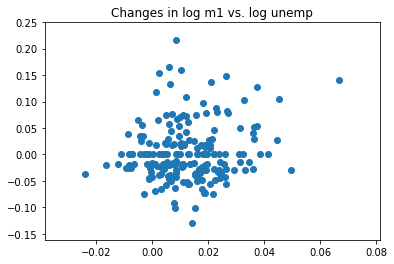

In [12]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

在探索式数据分析工作中，同时观察一组变量的散布图是很有帮助的，称之为散布图矩阵。  
pandas提供了一个能从DataFrame创建散布图矩阵的scatter_matrix函数。  
还支持在对角线上放置各变量的直方图和密度图。

D:\Program files\python3.6.2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012A65942320>,
      dtype=object)

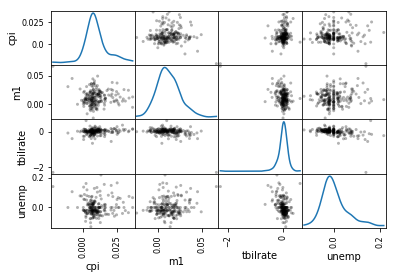

In [13]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)